# Install Dependencies

In [1]:
!pip install -q tensorflow tensorflow-hub Pillow numpy matplotlib

# Installing Libraries

In [2]:
import tensorflow as tf
import numpy as np
import PIL.Image
import tensorflow_hub as hub
import matplotlib.pyplot as plt

# Loading and Preprocessing Images

In [3]:
def load_img(path_to_img):
    """Load and preprocess image"""
    max_dim = 512
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)
    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img


# Tensor to Image Conversion

In [4]:
def tensor_to_image(tensor):
    """Convert tensor to PIL Image"""
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor) > 3:
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)



In [5]:
class StyleTransfer:
    def __init__(self):
        # Load pre-trained model from TensorFlow Hub
        self.model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

    def transfer_style(self, content_path, style_path):
        """Apply style transfer and return resulting image"""
        # Load content and style images
        content_image = load_img(content_path)
        style_image = load_img(style_path)

        # Generate stylized image
        stylized_image = self.model(tf.constant(content_image),
                                  tf.constant(style_image))[0]

        return tensor_to_image(stylized_image)

    def save_result(self, result_image, output_path):
        """Save the resulting image"""
        result_image.save(output_path)


# Image Visualization

In [6]:
def visualize_images(content_path, style_path, output_path):
    # Load the images
    content_image = load_img(content_path)
    style_image = load_img(style_path)
    stylized_image = load_img(output_path)

    # Display the images
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(load_img(content_path)[0])  # Display Content Image
    plt.title('Content Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(load_img(style_path)[0])   # Display Style Image
    plt.title('Style Image')
    plt.axis('off')


    plt.subplot(1, 3, 3)
    plt.imshow(PIL.Image.open(output_path))  # Display Stylized Image
    plt.title('Stylized Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Main Function

Stylized image saved to stylized_image.jpg


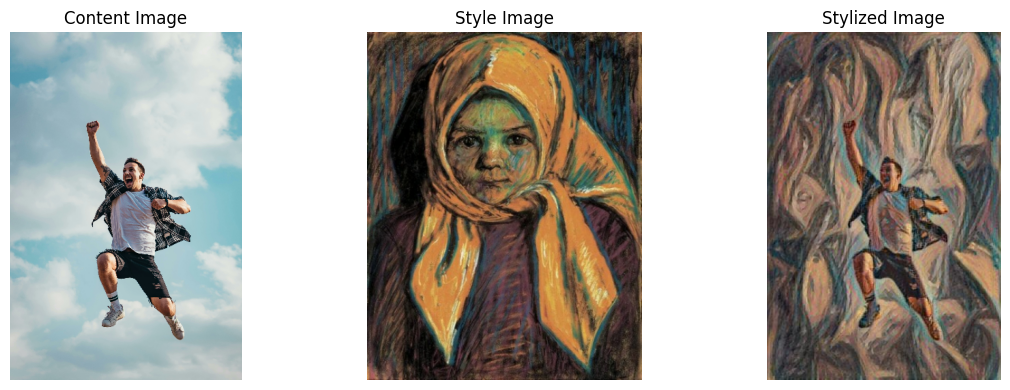

In [7]:
def main():
    # Example usage
    content_path = "/content/Content_image.jpg"  # Replace with your content image path
    style_path = "/content/Style_Image.jpg"      # Replace with your style image path
    output_path = "stylized_image.jpg"           # Output path

    # Initialize style transfer
    style_transfer = StyleTransfer()

    # Apply style transfer
    result = style_transfer.transfer_style(content_path, style_path)

    # Save result
    style_transfer.save_result(result, output_path)
    print(f"Stylized image saved to {output_path}")

    # Visualize Images
    visualize_images(content_path, style_path, output_path)

if __name__ == "__main__":
    main()